In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import io
from PIL import Image

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#df_matches = pd.read_csv('/content/drive/MyDrive/IPL_Matches_2008_2022.csv')
#df_balls = pd.read_csv('/content/drive/MyDrive/IPL_Ball_by_Ball_2008_2022.csv')

df_matches = pd.read_csv('dataset/IPL_Matches_2008_2022.csv')
df_balls = pd.read_csv('dataset/IPL_Ball_by_Ball_2008_2022.csv')

### Renaming features for analysis

In [4]:
df_matches.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [5]:
df_matches.columns = ['id','city','date','season','matchnumber','team1','team2','venue',
                      'tosswinner','tossdecision','superover','winningteam','wonby','margin',
                      'method','player_of_match','team1players','team2players','umpire1','umpire2']

In [6]:
df_balls.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

In [7]:
df_balls.columns = ['id','inning','over','ballnumber','batter','bowler','non_striker',
                    'extra_type','batsman_run','extras_run','total_runs','non_boundary',
                    'is_wicket', 'player_out','dismissal_kind','fielders_involved','battingteam']

In [8]:
df_matches.head()

,id,city,date,season,matchnumber,team1,team2,venue,tosswinner,tossdecision,superover,winningteam,wonby,margin,method,player_of_match,team1players,team2players,umpire1,umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [9]:
df_balls.head()

,id,inning,over,ballnumber,batter,bowler,non_striker,extra_type,batsman_run,extras_run,total_runs,non_boundary,is_wicket,player_out,dismissal_kind,fielders_involved,battingteam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


### Function to calculate a batter's all-time stats

In [10]:
def show_battingstats(batter_name):
    batter_stat=df_balls[df_balls['batter']==batter_name]
    bowler_wicket=['caught', 'lbw', 'bowled', 'caught and bowled','stumped','hit wicket']
    batter_run=sum(batter_stat['batsman_run'])
    matches_played=batter_stat.groupby('id').count().shape[0]
    given_out=sum(batter_stat.groupby('id').sum().reset_index(drop=True)['is_wicket'])
    strike_rate=round(100*(batter_run/batter_stat.shape[0]), 2)
    
    print('Batsman Name -',batter_name)
    print('Number of matches -', matches_played)
    print('Runs Scored -',batter_run)
    print('Average -', round(batter_run/given_out, 2))
    print('Strike Rate -',strike_rate)

    print('\n-----------------------------------------------\n')


    #plt.figure(figsize=(20,15))
    plt.rcParams["figure.figsize"] = [20, 15]
    plt.rcParams["figure.autolayout"] = True

    plt.figure()
    plt.subplot(2,2,1)
    plt.title('Scoring Patterns', size=15)
    batter_stat['batsman_run'].value_counts().plot.pie(autopct='%.2f%%')

    plt.subplot(1,2,2)
    plt.title('Dismissial Mode', size=15)
    batter_stat['dismissal_kind'].value_counts().plot.pie(autopct='%.2f%%')

    plt.subplot(2,2,3)
    plt.title(f"Top 10 bowler who took {batter_name}'s\n wicket most number of times", size=15)
    batter_stat[batter_stat['dismissal_kind'].isin(bowler_wicket)]['bowler'].value_counts()[:10].plot(kind='bar')
    plt.xlabel('Bowler Name', size=13)
    plt.ylabel('Number of dismissals', size=13)
    
    img_buf = io.BytesIO()
    plt.savefig(img_buf, format='png')

    im = Image.open(img_buf)
    im.show(title="My Image")

    img_buf.close()

Batsman Name - DA Warner
Number of matches - 162
Runs Scored - 5883
Average - 41.14
Strike Rate - 136.4

-----------------------------------------------



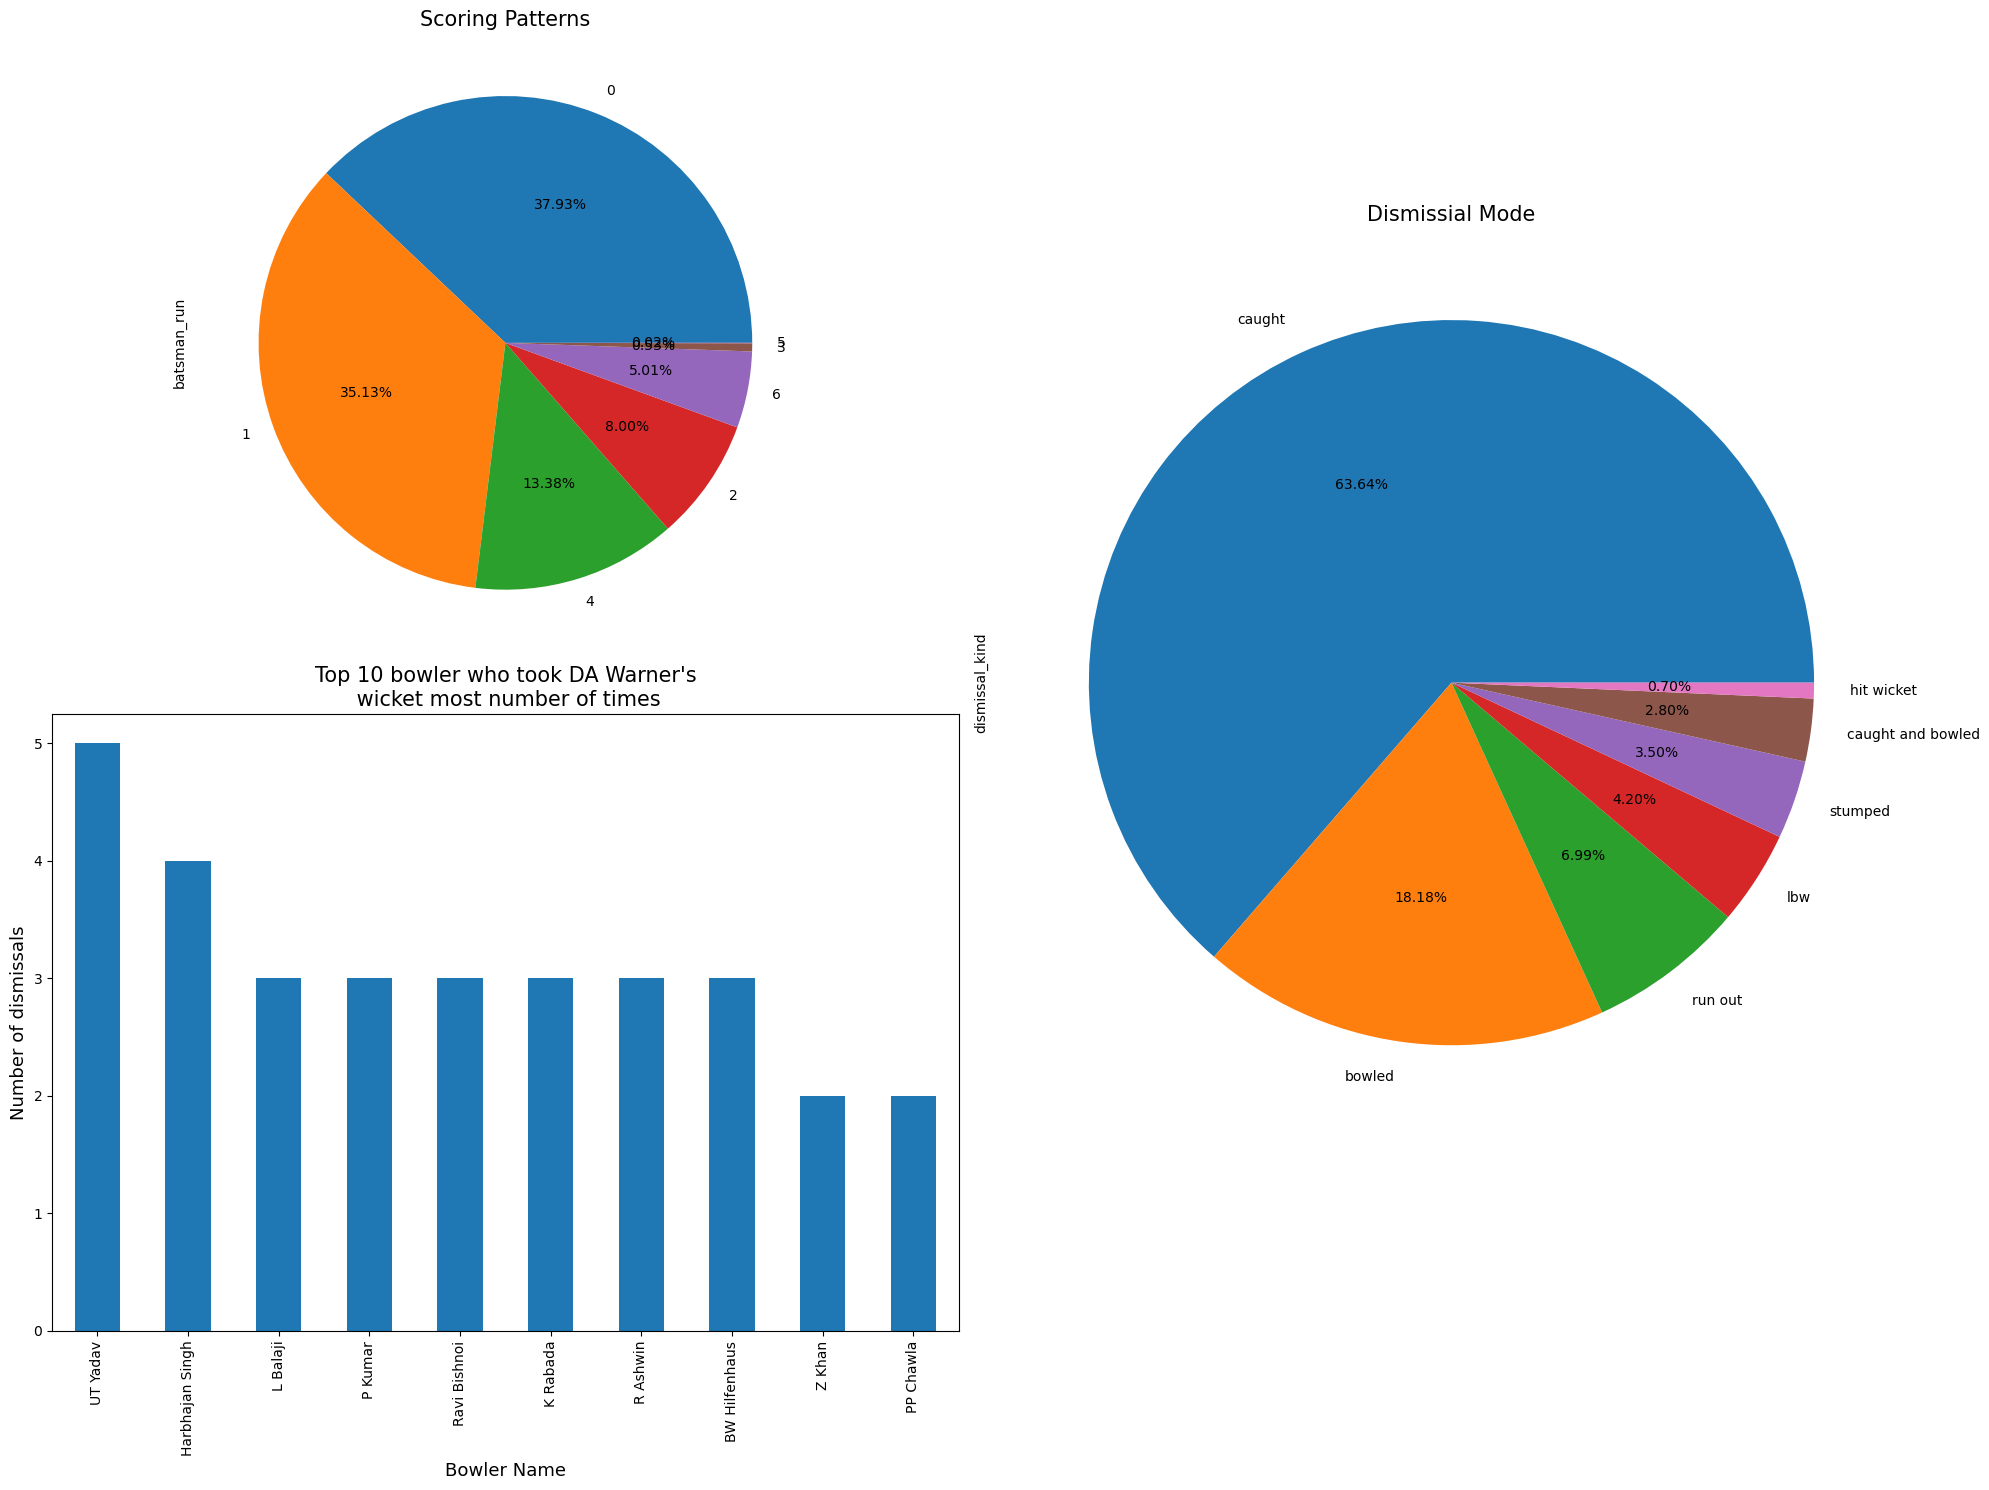

In [11]:
show_battingstats('DA Warner')

### Function to calculate a bowler's all-time stats

In [12]:
def show_bowlingstats(bowler_name):
    bowler_wicket_kind=['caught', 'lbw', 'bowled', 'caught and bowled','stumped','hit wicket']
    bowler_delivery=df_balls[df_balls['bowler']==bowler_name]
    bowler_wickets=bowler_delivery[bowler_delivery['dismissal_kind'].isin(bowler_wicket_kind)]

    wickets_taken=sum(bowler_wickets['is_wicket'])
    matches_played=bowler_delivery.groupby('id').count().shape[0]
    balls_bowled=df_balls[df_balls['bowler']==bowler_name].shape[0]
    run_conceded=sum(bowler_delivery['batsman_run'])
    economy=(run_conceded/balls_bowled)*6
    strike_rate=balls_bowled/wickets_taken
    
    print('Bowler Name -',bowler_name)
    print('Number of matches -', matches_played)
    print('Number of balls bowled -', balls_bowled)
    print('Runs Conceded -',run_conceded)
    print('Economy -', round(economy, 2))
    print('Strike Rate -',round(strike_rate,2))

    print('\n-----------------------------------------------\n')

    #plt.figure(figsize=(20,15))
    plt.rcParams["figure.figsize"] = [20,15]
    plt.rcParams["figure.autolayout"] = True

    plt.figure()
    plt.subplot(2,2,1)
    plt.title('Dismissial Kind',size=15)
    bowler_wickets['dismissal_kind'].value_counts().plot.pie(autopct='%.2f%%',startangle=135)
    plt.subplot(2,2,2)
    plt.title(f"Batters {bowler_name} has dismissed most number of times", size=15)
    plt.xlabel('Bowler Name', size=13)
    plt.ylabel('Number of times dismissed', size=13)
    bowler_wickets['batter'].value_counts().head(20).plot.bar()
    
    img_buf = io.BytesIO()
    plt.savefig(img_buf, format='png')

    im = Image.open(img_buf)
    im.show(title="My Image")

    img_buf.close()

Bowler Name - JD Unadkat
Number of matches - 90
Number of balls bowled - 1942
Runs Conceded - 2729
Economy - 8.43
Strike Rate - 21.34

-----------------------------------------------



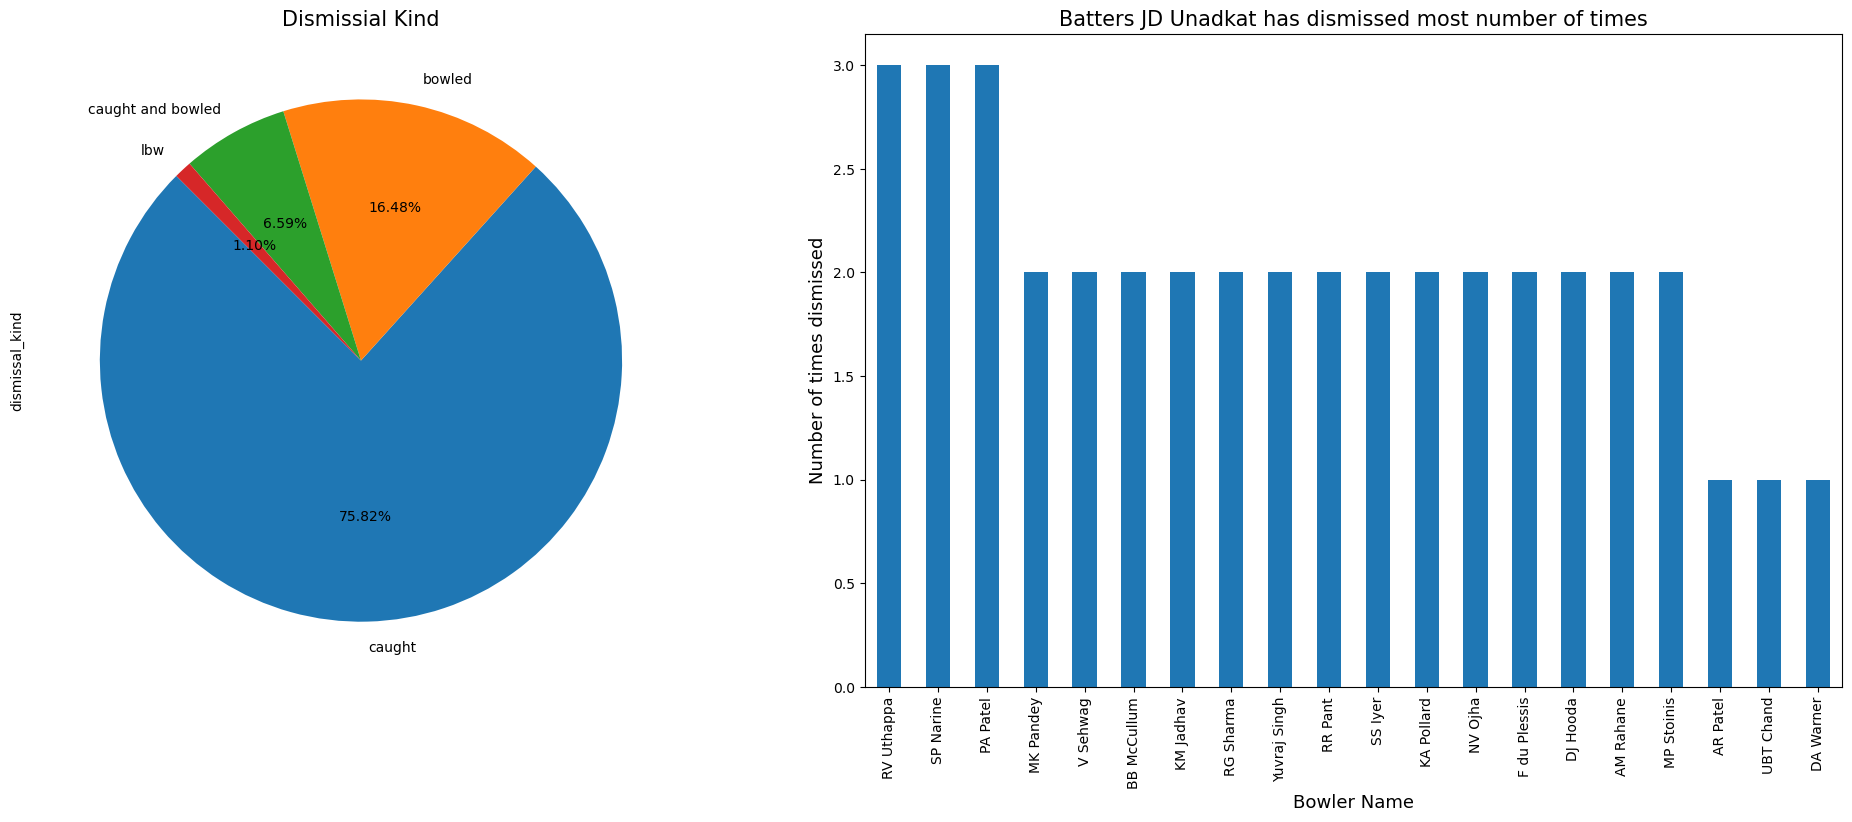

In [13]:
show_bowlingstats('JD Unadkat')

### Head-to-Head Match Ups

In [14]:
def head_to_head(batsman, bowler):
  try:
    batsman_scored=df_balls[(df_balls['batter']==batsman) & (df_balls['bowler']==bowler)].groupby('batter').sum()['total_runs'][0]
    bowler_wickets=df_balls[(df_balls['batter']==batsman) & (df_balls['bowler']==bowler) & (df_balls['is_wicket']==1)].shape[0]
    ball_faced=df_balls[(df_balls['batter']==batsman) & (df_balls['bowler']==bowler)].count()[0]
    NoOfFours=df_balls[(df_balls['batter']==batsman) & (df_balls['bowler']==bowler) & (df_balls['batsman_run']==4)].count()[0]
    NoOfSixes=df_balls[(df_balls['batter']==batsman) & (df_balls['bowler']==bowler) & (df_balls['batsman_run']==6)].count()[0]
    StrikeRate=round((batsman_scored/ball_faced)*100, 2)
    if bowler_wickets==0:
        average='Infinite'
    else:
        average=batsman_scored/bowler_wickets
    d={'Match Up':(batsman +" vs "+ bowler),'Balls':(ball_faced),'Run Scored':(batsman_scored),
      'Dismissals':(bowler_wickets),'Fours':(NoOfFours) ,'Sixes':(NoOfSixes),'Strike Rate':(StrikeRate),'Average':(average)}
    FinalStat=pd.DataFrame(data=d,index=[1])
    display(FinalStat)
  except:
    print('The input names do not exist in data.')

In [15]:
head_to_head('AB de Villiers', 'JD Unadkat')

,Match Up,Balls,Run Scored,Dismissals,Fours,Sixes,Strike Rate,Average
1,AB de Villiers vs JD Unadkat,26,46,0,1,5,176.92,Infinite


### Statistics for last 3 seasons

In [16]:
matches_2022 = list(df_matches['id'].loc[df_matches.season=='2022'])
matches_2021 = list(df_matches['id'].loc[df_matches.season=='2021'])
matches_2020 = list(df_matches['id'].loc[df_matches.season=='2020'])

recent_matches = matches_2022+matches_2021+matches_2020
all_matches = list(df_matches['id'])

In [17]:
teams = ['Rajasthan Royals',
         'Royal Challengers Bangalore', 
         'Delhi Capitals', 
         'Mumbai Indians',
         'Chennai Super Kings',
         'Gujarat Titans',
         'Sunrisers Hyderabad',
         'Punjab Kings',
         'Kolkata Knight Riders',
         'Lucknow Super Giants',
         'Kings XI Punjab',
         'Delhi Daredevils',
         'Rising Pune Supergiant',
         'Gujarat Lions',
         'Rising Pune Supergiants',
         'Pune Warriors',
         'Deccan Chargers',
         'Kochi Tuskers Kerala']

players = []

In [18]:
for game in recent_matches:
    team = list(df_matches['team1'].loc[df_matches.id==game])[0]
    XI_team1 = list(df_matches['team1players'].loc[df_matches.id==game])[0]
    XI_team2 = list(df_matches['team1players'].loc[df_matches.id==game])[0]
    listofplayers1 = re.findall(r"'([^']*)'", XI_team1)
    listofplayers2 = re.findall(r"'([^']*)'", XI_team2)
    for i in range(len(listofplayers1)):
        if listofplayers1[i] not in players:
            players.append(listofplayers1[i])
        else:
            continue
            
    for i in range(len(listofplayers2)):
        if listofplayers2[i] not in players:
            players.append(listofplayers2[i])
        else:
            continue

In [19]:
players=sorted(players)

In [20]:
all_players = []

for game in all_matches:
    team = list(df_matches['team1'].loc[df_matches.id==game])[0]
    XI_team1 = list(df_matches['team1players'].loc[df_matches.id==game])[0]
    XI_team2 = list(df_matches['team1players'].loc[df_matches.id==game])[0]
    listofplayers1 = re.findall(r"'([^']*)'", XI_team1)
    listofplayers2 = re.findall(r"'([^']*)'", XI_team2)
    for i in range(len(listofplayers1)):
        if listofplayers1[i] not in all_players:
            all_players.append(listofplayers1[i])
        else:
            continue
            
    for i in range(len(listofplayers2)):
        if listofplayers2[i] not in all_players:
            all_players.append(listofplayers2[i])
        else:
            continue

In [21]:
all_players = sorted(all_players)

In [22]:
#mydict = {i:players.count(i) for i in players}
#mydict

#### Preprocessing for season-by-season performance of batters

In [23]:
match_data = df_matches
ball_data = df_balls

ball_data['bowlingteam'] = ''
ball_data['first_batter'] = ''
ball_data['second_batter'] = ''

In [24]:
ball_data = pd.merge(ball_data, match_data[['id','team1','team2','season']], how='left', on='id')
ball_data['bowlingteam'] = ball_data.apply(lambda x: x['team2'] if x['battingteam'] == x['team1'] else x['team1'], axis=1)

In [25]:
match_data['win_against'] = match_data.apply(lambda x: x['team2'] if x['winningteam'] == x['team1'] else x['team1'], axis=1)

### Season-by-season performance analysis of batters

In [26]:
# Performance across seasons
def performance(batter):
  try :
    top_batsman=[batter]
    top_batsman_runs=ball_data[ball_data['batter'].isin(top_batsman)].groupby(['season','batter'])\
        .agg(batsman_total=('batsman_run', 'sum')).reset_index()\
        .sort_values(by=['season','batsman_total'], ascending=False)
    top_batsman_runs=top_batsman_runs.pivot_table('batsman_total', ['season'], 'batter').reset_index()

    plt.figure(figsize=(15,8))
    plt.plot(top_batsman_runs['season'], top_batsman_runs[batter], label = batter, linewidth=4, color='red')
    plt.xlabel("Season", fontsize=13) 
    plt.ylabel("Runs", fontsize=13)
    plt.title("Batter's Performance across seasons", fontsize=15) 
    plt.legend()
    plt.show()

  except:
    return "Please enter a valid name."

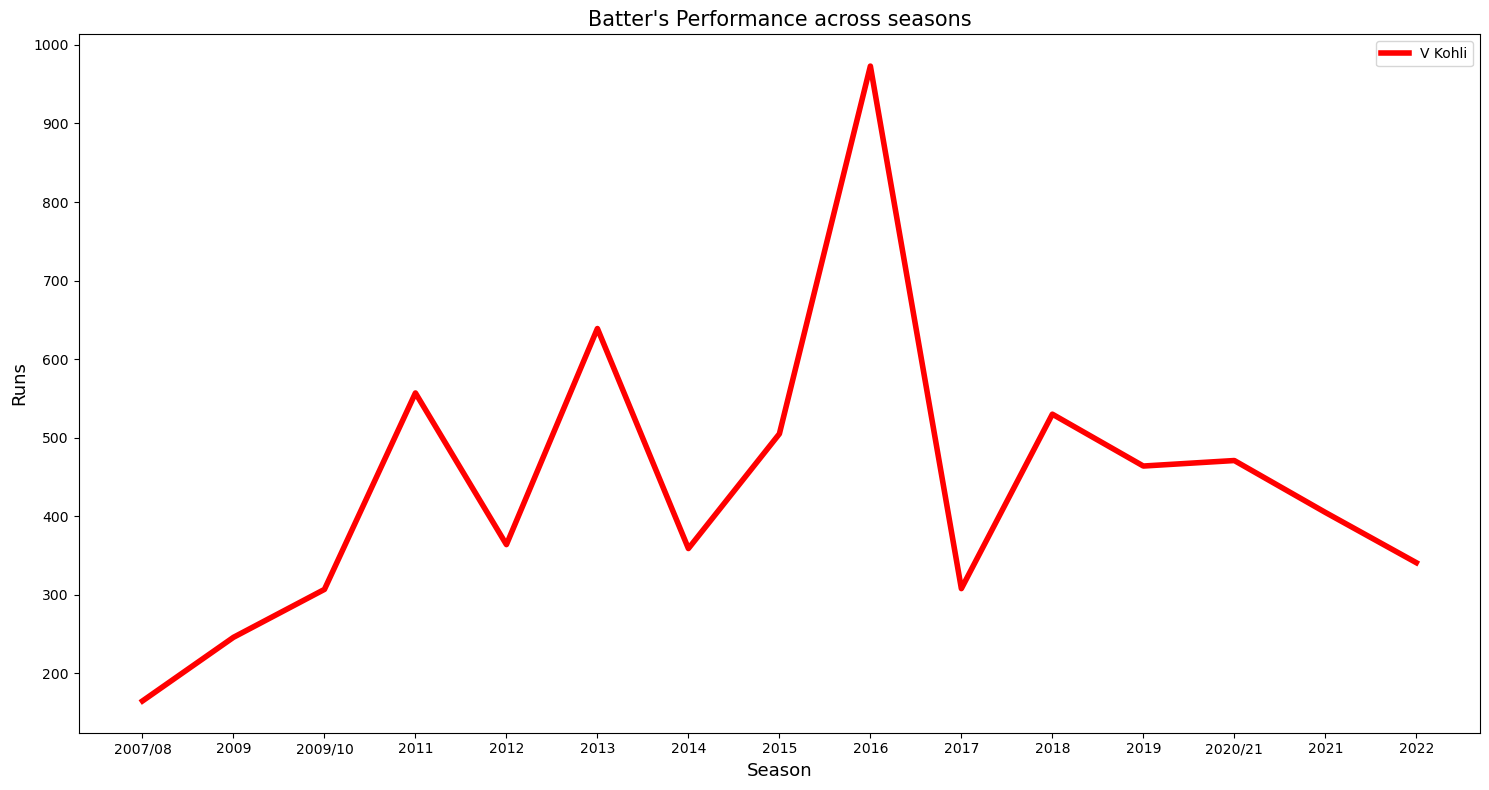

In [27]:
performance('V Kohli')

### All-time statistical analysis of players

In [28]:
def stats(players):
    data=[]
    for player in players:
        batter_stat=df_balls[df_balls['batter']==player]
        bowler_wicket=['caught', 'lbw', 'bowled', 'caught and bowled','stumped','hit wicket']
        batter_run=sum(batter_stat['batsman_run'])
        matches_played_batting=batter_stat.groupby('id').count().shape[0]
        given_out=sum(batter_stat.groupby('id').sum().reset_index(drop=True)['is_wicket'])
        
        try:
            strike_rate_batting=round(100*(batter_run/batter_stat.shape[0]), 2)
            average_batting = round(batter_run/given_out, 2)
            
            
        except:
            strike_rate_batting = None
            average_batting = None
        
        try:
            bowler_wicket_kind=['caught', 'lbw', 'bowled', 'caught and bowled','stumped','hit wicket']
            bowler_delivery=df_balls[df_balls['bowler']==player]
            bowler_wickets=bowler_delivery[bowler_delivery['dismissal_kind'].isin(bowler_wicket_kind)]
            wickets_taken=sum(bowler_wickets['is_wicket'])
            matches_played_bowling=bowler_delivery.groupby('id').count().shape[0]
            balls_bowled=df_balls[df_balls['bowler']==player].shape[0]
            runs_conceded=sum(bowler_delivery['batsman_run'])
            economy=round((runs_conceded/balls_bowled)*6, 2)
            strike_rate_bowling=round(balls_bowled/wickets_taken, 2)
            average_bowling=round(runs_conceded/wickets_taken, 2)

        except:
            matches_played_bowling = None
            wickets_taken = None
            balls_bowled = None
            runs_conceded = None
            economy = None
            average_bowling = None
            strike_rate_bowling=  None
   
        '''print('Batsman Name -',player)
        print('Number of matches -', matches_played_batting)
        print('Runs Scored -',batter_run)
        print('Average -', average_batting)
        print('Strike Rate -',strike_rate_batting)

        print('\n-----------------------------------------------\n')
        
        print('Number of matches bowled in -', matches_played_bowling)
        print('Wickets taken -', wickets_taken)
        print('Number of balls bowled -', balls_bowled)
        print('Runs Conceded -',runs_conceded)
        print('Economy -', economy)
        print('Average - ', average_bowling)
        print('Strike Rate -',strike_rate_bowling)'''
        
        row = [player, matches_played_batting, batter_run, average_batting, strike_rate_batting,
              matches_played_bowling, wickets_taken, balls_bowled, runs_conceded, economy, average_bowling, strike_rate_bowling]
        
        data.append(row)

        '''print('\n-----------------------------------------------')
        print('-----------------------------------------------\n')'''

    stats_df = pd.DataFrame(data, columns = ['player',
                                         'matches_played_batting',
                                         'batter_run', 
                                         'average_batting',
                                         'strike_rate_batting',
                                         'matches_played_bowling', 
                                         'wickets_taken',
                                         'balls_bowled',
                                         'runs_conceded',
                                         'economy',
                                         'average_bowling', 
                                         'strike_rate_bowling'])
    
    return stats_df

#### All-time stats of all players who featured in IPL across all seasons

In [29]:
all_stats_df = stats(all_players)
all_stats_df

,player,matches_played_batting,batter_run,average_batting,strike_rate_batting,matches_played_bowling,wickets_taken,balls_bowled,runs_conceded,economy,average_bowling,strike_rate_bowling
0,A Ashish Reddy,23,280,18.67,142.86,20.0,18.0,270.0,386.0,8.58,21.44,15.00
1,A Badoni,11,161,17.89,115.83,2.0,2.0,12.0,11.0,5.50,5.50,6.00
2,A Chandila,2,4,4.00,57.14,12.0,11.0,234.0,242.0,6.21,22.00,21.27
3,A Chopra,6,53,10.60,70.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A Choudhary,3,25,12.50,125.00,5.0,5.0,108.0,137.0,7.61,27.40,21.60
...,...,...,...,...,...,...,...,...,...,...,...,...
601,YV Takawale,10,192,24.00,104.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
602,Yash Dayal,1,0,0.00,0.00,9.0,11.0,205.0,283.0,8.28,25.73,18.64
603,Yashpal Singh,4,47,11.75,70.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
604,Yuvraj Singh,126,2754,25.27,124.78,73.0,36.0,882.0,1064.0,7.24,29.56,24.50


#### All-time statistics of players who featured in last 3 seasons

In [30]:
stats_df = stats(players)
stats_df

,player,matches_played_batting,batter_run,average_batting,strike_rate_batting,matches_played_bowling,wickets_taken,balls_bowled,runs_conceded,economy,average_bowling,strike_rate_bowling
0,A Badoni,11,161,17.89,115.83,2.0,2.0,12.0,11.0,5.50,5.50,6.00
1,A Manohar,7,108,18.00,136.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A Mishra,54,362,12.07,88.29,154.0,166.0,3317.0,3897.0,7.05,23.48,19.98
3,A Nortje,4,8,8.00,61.54,30.0,43.0,706.0,884.0,7.51,20.56,16.42
4,AB de Villiers,170,5181,41.45,148.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
207,WP Saha,117,2427,25.28,124.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,Washington Sundar,32,318,13.83,114.39,49.0,33.0,928.0,1090.0,7.05,33.03,28.12
209,YBK Jaiswal,23,547,23.78,133.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,YS Chahal,17,37,6.17,41.57,130.0,166.0,2940.0,3524.0,7.19,21.23,17.71


#### Power Hitters segregation

In [31]:
def get_power_hitters(df):
  power_hitters = df.loc[df.strike_rate_batting>140].loc[df.matches_played_batting>=5]
  power_hitters = power_hitters.reset_index()
  power_hitters.drop('index',axis=1, inplace=True)
  return power_hitters

#### Anchor batters segregation

In [32]:
def get_anchors(df):
  anchors = df.loc[(df.strike_rate_batting>=110) & (df.strike_rate_batting<=140)].loc[df.matches_played_batting>=5]
  anchors = anchors.reset_index()
  anchors.drop('index',axis=1, inplace=True)
  return anchors

In [33]:
power_hitters = get_power_hitters(stats_df)
power_hitters

,player,matches_played_batting,batter_run,average_batting,strike_rate_batting,matches_played_bowling,wickets_taken,balls_bowled,runs_conceded,economy,average_bowling,strike_rate_bowling
0,AB de Villiers,170,5181,41.45,148.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD Russell,81,2039,30.89,168.23,89.0,89.0,1484.0,2114.0,8.55,23.75,16.67
2,Avesh Khan,6,31,31.00,163.16,38.0,47.0,868.0,1124.0,7.77,23.91,18.47
3,CH Gayle,141,4997,39.04,142.12,38.0,18.0,584.0,680.0,6.99,37.78,32.44
4,CH Morris,49,618,21.31,149.64,81.0,96.0,1801.0,2220.0,7.40,23.12,18.76
5,D Pretorius,5,44,11.00,157.14,6.0,6.0,138.0,198.0,8.61,33.00,23.00
6,DP Conway,7,252,42.00,143.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,GJ Maxwell,105,2320,25.78,147.68,66.0,28.0,803.0,1060.0,7.92,37.86,28.68
8,HH Pandya,100,1972,29.88,140.26,70.0,50.0,1103.0,1484.0,8.07,29.68,22.06
9,JC Buttler,81,2832,39.89,144.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
anchors = get_anchors(stats_df)
anchors

,player,matches_played_batting,batter_run,average_batting,strike_rate_batting,matches_played_bowling,wickets_taken,balls_bowled,runs_conceded,economy,average_bowling,strike_rate_bowling
0,A Badoni,11,161,17.89,115.83,2.0,2.0,12.0,11.0,5.50,5.50,6.00
1,A Manohar,7,108,18.00,136.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AJ Finch,90,2092,24.90,123.35,5.0,1.0,44.0,66.0,9.00,66.00,44.00
3,AJ Tye,13,91,11.38,115.19,30.0,42.0,714.0,949.0,7.97,22.60,17.00
4,AK Markram,18,527,40.54,131.75,6.0,1.0,61.0,86.0,8.46,86.00,61.00
...,...,...,...,...,...,...,...,...,...,...,...,...
84,V Shankar,41,731,24.37,118.67,22.0,9.0,258.0,323.0,7.51,35.89,28.67
85,VR Iyer,22,552,27.60,116.46,8.0,3.0,78.0,112.0,8.62,37.33,26.00
86,WP Saha,117,2427,25.28,124.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,Washington Sundar,32,318,13.83,114.39,49.0,33.0,928.0,1090.0,7.05,33.03,28.12


### Recent statistics of players who featured in last 3 seasons

In [35]:
print(max(recent_matches), min(recent_matches))

1312200 1254058


In [36]:
recent_matches = df_balls.loc[(df_balls.id<=1312200) & (df_balls.id>=1254058)]

#### Recent statistics of players

In [37]:
def recent_stats(players):
    recent_data=[]
    for player in players:
        batter_stat=recent_matches[recent_matches['batter']==player]
        bowler_wicket=['caught', 'lbw', 'bowled', 'caught and bowled','stumped','hit wicket']
        batter_run=sum(batter_stat['batsman_run'])
        matches_played_batting=batter_stat.groupby('id').count().shape[0]
        given_out=sum(batter_stat.groupby('id').sum().reset_index(drop=True)['is_wicket'])
        
        try:
            strike_rate_batting=round(100*(batter_run/batter_stat.shape[0]), 2)
            average_batting = round(batter_run/given_out, 2)
            
            
        except:
            strike_rate_batting = None
            average_batting = None
        
        try:
            bowler_wicket_kind=['caught', 'lbw', 'bowled', 'caught and bowled','stumped','hit wicket']
            bowler_delivery=recent_matches[recent_matches['bowler']==player]
            bowler_wickets=bowler_delivery[bowler_delivery['dismissal_kind'].isin(bowler_wicket_kind)]
            wickets_taken=sum(bowler_wickets['is_wicket'])
            matches_played_bowling=bowler_delivery.groupby('id').count().shape[0]
            balls_bowled=recent_matches[recent_matches['bowler']==player].shape[0]
            runs_conceded=sum(bowler_delivery['batsman_run'])
            economy=round((runs_conceded/balls_bowled)*6, 2)
            strike_rate_bowling=round(balls_bowled/wickets_taken, 2)
            average_bowling=round(runs_conceded/wickets_taken, 2)

        except:
            matches_played_bowling = None
            wickets_taken = None
            balls_bowled = None
            runs_conceded = None
            economy = None
            average_bowling = None
            strike_rate_bowling=  None
        
        row = [player, matches_played_batting, batter_run, average_batting, strike_rate_batting,
              matches_played_bowling, wickets_taken, balls_bowled, runs_conceded, economy, average_bowling, strike_rate_bowling]
        
        recent_data.append(row)

        
    recent_stats_df = pd.DataFrame(recent_data, columns = ['player',
                                         'matches_played_batting',
                                         'batter_run', 
                                         'average_batting',
                                         'strike_rate_batting',
                                         'matches_played_bowling', 
                                         'wickets_taken',
                                         'balls_bowled',
                                         'runs_conceded',
                                         'economy',
                                         'average_bowling', 
                                         'strike_rate_bowling'])
    
    return recent_stats_df

In [38]:
recent_stats_df = recent_stats(players)
recent_stats_df.head()

,player,matches_played_batting,batter_run,average_batting,strike_rate_batting,matches_played_bowling,wickets_taken,balls_bowled,runs_conceded,economy,average_bowling,strike_rate_bowling
0,A Badoni,11,161,17.89,115.83,2.0,2.0,12.0,11.0,5.50,5.50,6.00
1,A Manohar,7,108,18.00,136.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A Mishra,0,0,NaN,NaN,4.0,6.0,84.0,109.0,7.79,18.17,14.00
3,A Nortje,1,1,NaN,NaN,14.0,21.0,330.0,382.0,6.95,18.19,15.71
4,AB de Villiers,14,313,28.45,145.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Power Hitters segregation

In [39]:
power_hitters_recent = get_power_hitters(recent_stats_df)
power_hitters_recent

,player,matches_played_batting,batter_run,average_batting,strike_rate_batting,matches_played_bowling,wickets_taken,balls_bowled,runs_conceded,economy,average_bowling,strike_rate_bowling
0,AB de Villiers,14,313,28.45,145.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD Russell,20,518,34.53,158.41,21.0,28.0,298.0,447.0,9.00,15.96,10.64
2,Avesh Khan,5,27,27.00,168.75,29.0,42.0,683.0,830.0,7.29,19.76,16.26
3,D Pretorius,5,44,11.00,157.14,6.0,6.0,138.0,198.0,8.61,33.00,23.00
4,DJ Bravo,9,70,17.50,145.83,21.0,30.0,450.0,519.0,6.92,17.30,15.00
5,DP Conway,7,252,42.00,143.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,E Lewis,10,224,28.00,143.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,GJ Maxwell,27,814,38.76,146.14,16.0,9.0,245.0,295.0,7.22,32.78,27.22
8,JC Buttler,24,1117,50.77,145.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,JD Unadkat,8,100,33.33,144.93,11.0,10.0,257.0,352.0,8.22,35.20,25.70


#### Anchor batters segregation

In [40]:
anchors = get_anchors(recent_stats_df)
anchors

,player,matches_played_batting,batter_run,average_batting,strike_rate_batting,matches_played_bowling,wickets_taken,balls_bowled,runs_conceded,economy,average_bowling,strike_rate_bowling
0,A Badoni,11,161,17.89,115.83,2.0,2.0,12.0,11.0,5.50,5.50,6.00
1,A Manohar,7,108,18.00,136.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AJ Finch,5,86,14.33,122.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AK Markram,18,527,40.54,131.75,6.0,1.0,61.0,86.0,8.46,86.00,61.00
4,AR Patel,16,222,27.75,127.59,25.0,21.0,546.0,626.0,6.88,29.81,26.00
...,...,...,...,...,...,...,...,...,...,...,...,...
64,Tilak Varma,14,397,39.70,126.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,UT Yadav,7,55,13.75,134.15,12.0,16.0,297.0,330.0,6.67,20.62,18.56
66,V Kohli,31,746,24.87,114.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,VR Iyer,22,552,27.60,116.46,8.0,3.0,78.0,112.0,8.62,37.33,26.00


In [41]:
stats_df.to_csv('dataset/recent_players_alltime_stats.csv')

In [42]:
recent_stats_df.to_csv('dataset/recent_players_recent_stats.csv')

In [43]:
all_stats_df.to_csv('dataset/alltime_stats_all_players.csv')